In [22]:
#|default_exp
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

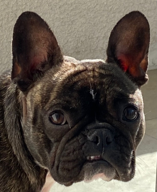

In [23]:
im = PILImage.create('./images/dog.jpg')
im.thumbnail((192, 192))
im

In [24]:
import pathlib
plt = platform.system()
if plt == 'Windows': pathlib.PosixPath = pathlib.WindowsPath

In [25]:
#|export
learn = load_learner('02_model.pkl')

In [26]:
%timeit learn.predict(im)

70.9 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
learn.predict(im)

('False', TensorImage(0), TensorImage([9.9999e-01, 1.3868e-05]))

In [28]:
#|default_exp
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [29]:
classify_image(im)

{'Dog': 0.9999861717224121, 'Cat': 1.3867676898371428e-05}

In [30]:
#|default_exp
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['./images/dog.jpg', './images/cat.jpg', './images/dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\zzz\AppData\Local\Temp\ipykernel_24316\2103943109.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192, 192))
C:\Users\zzz\AppData\Local\Temp\ipykernel_24316\2103943109.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192, 192))
C:\Users\zzz\AppData\Local\Temp\ipykernel_24316\2103943109.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
C:\Users\zzz\AppData\Local\Temp\ipykernel_24316\2103943109.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [31]:
import nbdev
nbdev.__version__

'2.3.12'